# Dog Breed Identification

# 1 Objective

#### The objective is to correctly classify the image as a Dog and then identify its breed using deep neural networks. 

Given a dataset of images, an algorithm needs to be developed to classify each different dog’s breed and correctly identify the dog breed. We will create a CNN that classifies dog breeds.
 
This problem is not only challenging but also its solution is applicable to other fine- grained classification problems. For example, the methods used to solve this problem would also help identify breeds of cats and horses as well as species of birds and plants - or even models of cars. Any set of classes with relatively small variation within it can be solved as a fine-grained classification problem. In the real-world, an identifier like this could be used in biodiversity studies, helping scientists save time and resources when conducting studies about the health and abundance of certain species populations.

# 2 Client

The client for this work is Kaggle

# 3 Data

The dataset was provided by Kaggle, Stanford and ImageNet. The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization.

Kaggle: https://www.kaggle.com/c/dog-breed-identification

Stanford: http://vision.stanford.edu/aditya86/ImageNetDogs/

ImageNet: http://image-net.org/download-API

# 4 Solution Approach

The solution plans to use CNN to help with image selection and dog breed identification. A deep learning algorithm will be developed using Tensorflow/Keras and will be trained with training data. Specifically, a CNN will be implemented in Tensorflow/Keras and will be optimized to minimize multi-class logarithmic loss. Predictions will be made on the test data set and will be evaluated.

It is specifically designed to address large dataset with biodiversity and quality issues like image qulaity, multiple faces, missing key features etc. The solution is sub-divided into three phases as listed below.


### a)Data Assembly - Phase I:
This phase of the project is designed to gather and do basic cleanup like join, merge, add or update attributes.

### b)Explore and Preprocessing – Phase II:
This phase of the project is designed to validate and explore the dataset for predicting a dog's breed from an image.

### c)Modelling and Evaluation Phase III:
This phase of the project will focus on exploring various machine learning algorithms and finding the right model architecture to find the best model to classify the Dog Breed.

# 4.1 Data Assembly - Phase I:

In this phase we will collect and assemble data required to create the Convolutional Neural Netwroks for breed identification.

# 4.1.2 Import Dog Image Data

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

Using TensorFlow backend.
/home/subir_das1/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
dog_breed = [file.split('.')[1][:-1] for file in sorted(glob("Images/train/*/"))]
dog_breed[2:6]

['Airedale_terrier', 'Akita', 'Alaskan_malamute', 'American_eskimo_dog']

In [3]:
# define function to load train, test, and validation datasets
def load_images(filepath):
    Imgdata = load_files(filepath)
    dog_files = np.array(Imgdata['filenames'])
    dog_targets = np_utils.to_categorical(np.array(Imgdata['target']), len(dog_breed))
    return dog_files, dog_targets

# Leading features(X) and test(y) data
X_train, X_train_targets = load_images('Images/train')
X_valid, X_valid_targets = load_images('Images/valid')
y_test, y_test_targets = load_images('Images/test')

# print statistics about the dataset
print('Dog Breeds: %d' % len(dog_breed))
print('Total Images: %d' % len(np.hstack([X_train, X_valid, y_test])))
print('Training Images: %d' % len(X_train))
print('Validation Images: %d' % len(X_valid))
print('Test Images: %d'% len(y_test))

Dog Breeds: 133
Total Images: 8351
Training Images: 6680
Validation Images: 835
Test Images: 836


Dog Breed: asz/Kuvasz_06442.jp


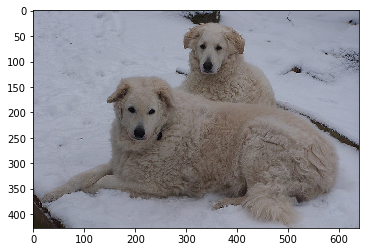

Dog Breed: matian/Dalmatian_04054.jp


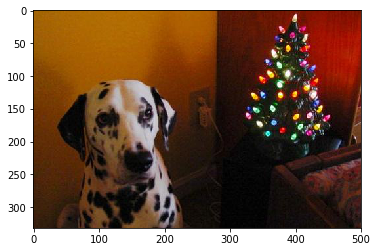

Dog Breed: sh_water_spaniel/Irish_water_spaniel_06014.jp


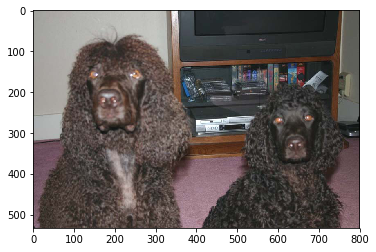

Dog Breed: rican_staffordshire_terrier/American_staffordshire_terrier_00596.jp


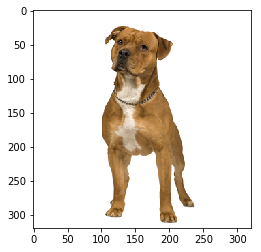

Dog Breed: rican_staffordshire_terrier/American_staffordshire_terrier_00563.jp


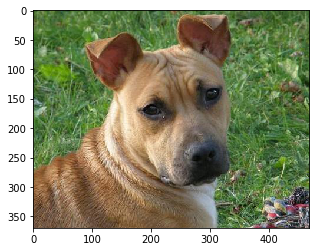

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline 

def show_image(i):    
    print("Dog Breed:",i[20:-1])
    img = cv2.imread(i)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(cv_rgb)
    plt.show()
    return None

_=[show_image(i) for i in X_train[:5]]

### Few challenging dog breeds. These are challenging for Humans  

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
samples=["Images/train/037.Brittany/Brittany_02592.jpg",
         "Images/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08195.jpg",
         "Images/train/055.Curly-coated_retriever/Curly-coated_retriever_03860.jpg",
         "Images/train/009.American_water_spaniel/American_water_spaniel_00623.jpg",
         "Images/train/096.Labrador_retriever/Labrador_retriever_06457.jpg",
         "Images/train/096.Labrador_retriever/Labrador_retriever_06464.jpg",
         "Images/train/096.Labrador_retriever/Labrador_retriever_06492.jpg",
         "Images/train/096.Labrador_retriever/Labrador_retriever_06486.jpg"]

Dog Breed: ttany/Brittany_02592.jp


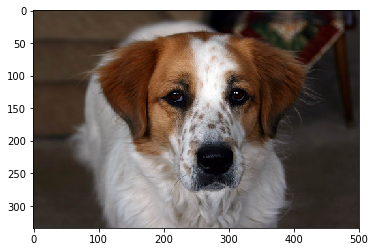

Dog Breed: sh_springer_spaniel/Welsh_springer_spaniel_08195.jp


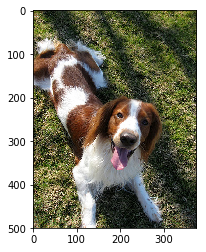

Dog Breed: ly-coated_retriever/Curly-coated_retriever_03860.jp


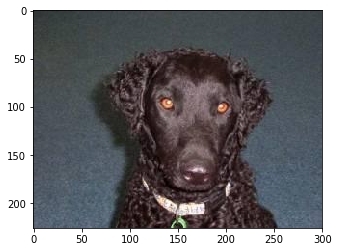

Dog Breed: rican_water_spaniel/American_water_spaniel_00623.jp


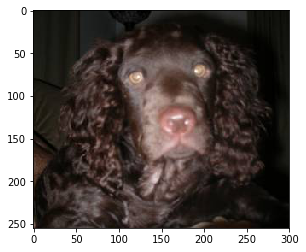

Dog Breed: rador_retriever/Labrador_retriever_06457.jp


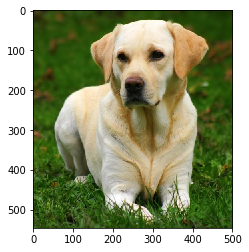

Dog Breed: rador_retriever/Labrador_retriever_06464.jp


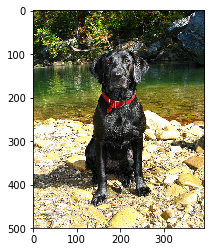

Dog Breed: rador_retriever/Labrador_retriever_06492.jp


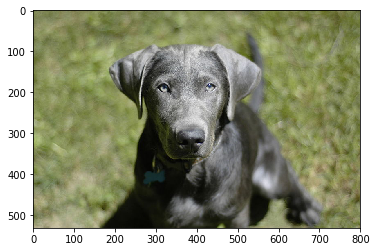

Dog Breed: rador_retriever/Labrador_retriever_06486.jp


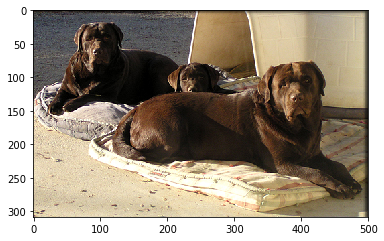

In [7]:
_=[show_image(i) for i in samples]

In [8]:
import os
lst=[(r, len(files)) for r, d, files in os.walk("Images/train/")][1:]

In [9]:
import pandas as pd
df = pd.DataFrame(data=lst,columns=['Breed','ImageCount'])

In [10]:
df.Breed=df.Breed.apply(lambda a :a.split('.')[1])

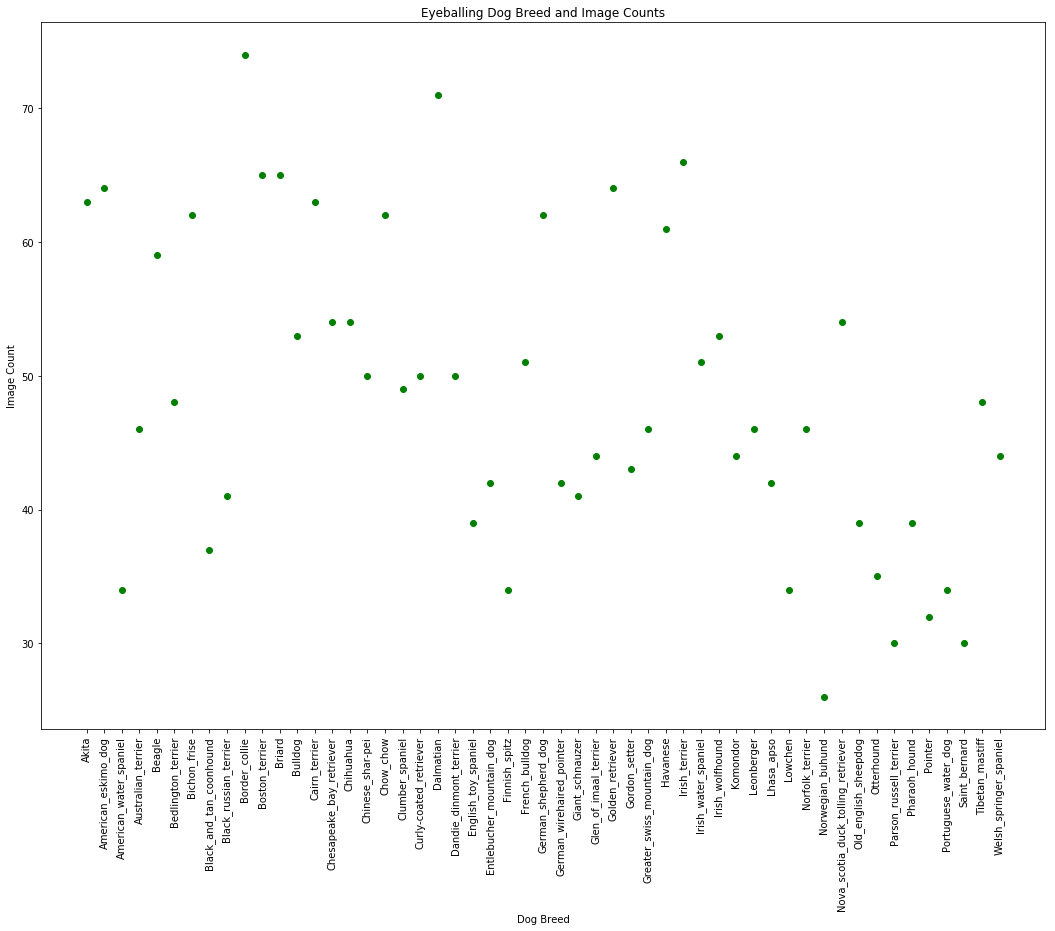

In [11]:
fig, axes = plt.subplots(figsize=(18, 13))
_=plt.scatter(df.Breed.head(53), df.ImageCount.head(53),color='g')
_=plt.xlabel("Dog Breed")
_=plt.ylabel("Image Count")
_=plt.title("Eyeballing Dog Breed and Image Counts")
_=plt.xticks(rotation=90)
plt.show()

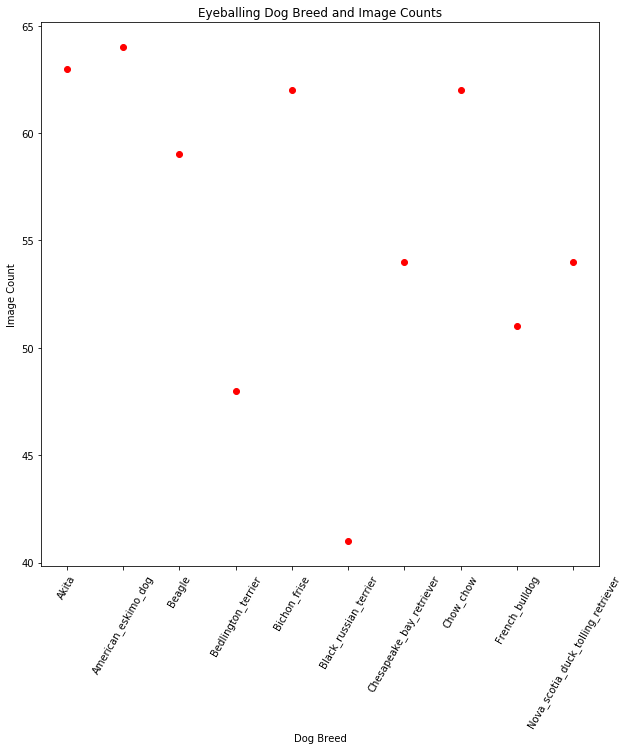

In [12]:
fig, axes = plt.subplots(figsize=(10, 10))
_=plt.scatter(df.Breed.head(10), df.ImageCount.head(10),color='r')
_=plt.xlabel("Dog Breed")
_=plt.ylabel("Image Count")
_=plt.title("Eyeballing Dog Breed and Image Counts")
_=plt.xticks(rotation=60)
plt.show()

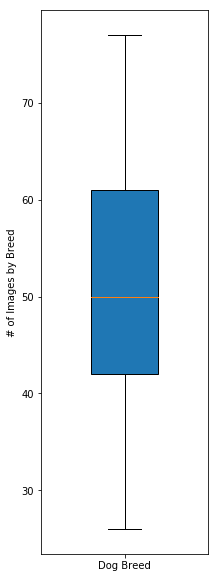

In [13]:
fig, axes = plt.subplots(figsize=(3, 10))
#fig.suptitle('Image Stats', fontsize=10, fontweight='bold')
axes.set_ylabel('# of Images by Breed')

_ = axes.boxplot(
    [df.ImageCount], \
    positions = [1], \
    labels = ['Dog Breed'], \
    patch_artist = True, widths = 0.4,showfliers=1,sym='gx')

for flier in _['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=.75)
    
#fig, axes = plt.subplots(2,1, figsize=(3, 10))        
#bp=plt.boxplot(df_pulitzer.winnfinalists_1990_2003,widths=0.3,showfliers=True,  \
#               patch_artist=True,sym='b+',labels=['Pulitzer Price (1990 to 2003)'])

#for flier in bp['fliers']:
#    flier.set(marker='o', color='#e7298a', alpha=.75)
    
#print([item.get_ydata()[0] for item in _['whiskers']])
#print([item.get_ydata()[0] for item in _['medians']])
#print([item.get_ydata()[0] for item in _['caps']])
#axes.text(1.05, 7.25, '%.3f' % 6.75,  verticalalignment='center', fontsize=9)#, backgroundcolor="white")
plt.show()

In [14]:
df.describe()

,ImageCount
count,133.000000
mean,50.225564
std,11.863885
min,26.000000
25%,42.000000
50%,50.000000
75%,61.000000
max,77.000000


## Detecting Dogs in the Images:
We will use a pre-trained ResNet-50 model to detect dogs in images. ResNet-50 model and its weights are trained on ImageNet.

In [15]:
from keras.applications.resnet50 import ResNet50
ResNet50_model = ResNet50(weights='imagenet')

Keras CNNs with TensorFlow need a 4D tensor as input, with shape as (samples,rows,columns,channels) where 
samples: Total number of images and rows, columns, and channels(RBG) are number of rows, columns, and channels for each image.

We take color image file path convert that into a 4D tensor suitable for supplying to a Keras CNN. 

In [16]:
from keras.preprocessing import image                  
from tqdm import tqdm

def tensor(file):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(file, target_size=(224, 224))    
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def tensorlist(filenames):
    tensors_list = [tensor(file) for file in tqdm(filenames)]
    return np.vstack(tensors_list)

In [17]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(file):
    # returns prediction vector for image
    img = preprocess_input(tensor(file))
    return np.argmax(ResNet50_model.predict(img))

In [18]:
### returns "True" if a dog is detected in the image
def predictdog(file):
    prediction = ResNet50_predict_labels(file)
    return ((prediction <= 268) & (prediction >= 151)) 

In [19]:
f = lambda x: predictdog(x)
dog_= np.fromiter((int(f(xi)) for xi in X_train[:100]), int, count=100)
print('Percentage of dogs correctly classified as dogs: {}%'.format(dog_.sum()))

Percentage of dogs correctly classified as dogs: 100%


# Classification of Dog breeds

### Pre-processing the image files
The images are rescaled by dividing every pixel in every image by 255.

In [20]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = tensorlist(X_train).astype('float32')/255
valid_tensors = tensorlist(X_valid).astype('float32')/255
test_tensors = tensorlist(y_test).astype('float32')/255

100%|██████████| 836/836 [00:09<00:00, 92.61it/s] 


## Model Architecture 1
A CNN is created to classify Dog images. At the end of the code cell block, the layers of the model are summarized by executing the line: model.summary()

We have created 4 convolutional layers with 4 max pooling layers in between. Filters were increased from 64 to 512 in each of the convolutional layers. Also dropout was used along with flattening layer before using the fully connected layer. Number of nodes in the last fully connected layer were setup as 10 along with softmax activation function. Relu activation function was used for all other layers.Xavier initialization was used in each of the layers.

4 convolutional layers were used to learn hierarchy of high level features. Max pooling layer is added to reduce the dimensionality. Flatten layer is added to reduce the matrix to row vector. This is because fully connected layer only accepts row vector. Dropout layers were added to reduce overfitting and ensure that the network generalizes well. The last fully connected layer with softmax activation function is added to obtain probabilities of the prediction.

In [21]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, (2, 2), activation='relu', padding = 'same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(133, activation = 'softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
__________

In [ ]:
from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='weights.best.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, X_train_targets, 
          validation_data=(valid_tensors, X_valid_targets),
          epochs=10, batch_size=20, callbacks=[checkpointer], verbose=1)

In [22]:
model.load_weights('weights.best.hdf5')

# Testing the Model

In [26]:
# get index of predicted dog breed for each image in test set
_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(_predictions)==np.argmax(y_test_targets, axis=1))/len(_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 6.1005%


# Observations:
We can see that model prediction is not that good. We have to try transfer learning and retrain the model based on new layers. 

# Using CNN to Classify Dog Breeds

## Bottleneck Features

In [28]:
bottleneck_features = np.load('DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

# Model Architecture 2 - Using Pre-Trained VGG-16 model
The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model. We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each driver category and is equipped with a softmax.

In [29]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax')) # last layer should be softmax
VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [30]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Again train the model

In [31]:
checkpointer = ModelCheckpoint(filepath='weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)


VGG16_model.fit(train_VGG16, X_train_targets, 
          validation_data=(valid_VGG16, X_valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 324us/step - loss: 13.0050 - acc: 0.1012 - val_loss: 11.6505 - val_acc: 0.1976
Epoch 2/20
6680/6680 [==============================] - 1s 223us/step - loss: 11.1643 - acc: 0.2377 - val_loss: 10.9756 - val_acc: 0.2419
Epoch 3/20
6680/6680 [==============================] - 2s 227us/step - loss: 10.5951 - acc: 0.2942 - val_loss: 10.6832 - val_acc: 0.2623
Epoch 4/20
6680/6680 [==============================] - 2s 231us/step - loss: 10.3452 - acc: 0.3241 - val_loss: 10.6448 - val_acc: 0.2886
Epoch 5/20
6680/6680 [==============================] - 2s 231us/step - loss: 10.2542 - acc: 0.3400 - val_loss: 10.4979 - val_acc: 0.3006
Epoch 6/20
6680/6680 [==============================] - 2s 235us/step - loss: 10.2055 - acc: 0.3515 - val_loss: 10.4819 - val_acc: 0.3054
Epoch 7/20
6680/6680 [==============================] - 2s 230us/step - loss: 10.1720 - acc: 0.3567 - val_loss: 10.4427 - val

In [32]:
VGG16_model.load_weights('weights.best.VGG16.hdf5') #Loading the Best Validation Loss model

## Test the model

In [33]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(y_test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 38.1579%


## Predicting breed with the new model i.e VGG16

In [34]:
def VGG16_predict_breed(filepath):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(tensor(filepath))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return breed from new model
    return dog_names[np.argmax(predicted_vector)]

# Observation:
We can see that the model accuracy is below 60%. In the next stage we will use Bottleneck factuers and diffrent pre-trained model. 

# Using InceptionV3

## Bottleneck features to improve the accuracy
We are going to use the bottleneck features from a different pre-trained model. We plan to use already computed inception V3 bottleneck features model.


In [35]:
bottleneck_features = np.load('DogInceptionV3Data.npz')
train_InceptionV3 = bottleneck_features['train']
valid_InceptionV3 = bottleneck_features['valid']
test_InceptionV3 = bottleneck_features['test']

# Model Architecture 3

In [36]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

InceptionV3_model = Sequential()
InceptionV3_model.add(GlobalAveragePooling2D(input_shape=(5,5,2048))) # Transfer learning
InceptionV3_model.add(Dense(133, activation='softmax'))

InceptionV3_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [37]:
from keras.optimizers import Adam, Adamax
InceptionV3_model.compile(loss='categorical_crossentropy', optimizer=Adamax(lr=0.002), metrics=['accuracy'])

# Train the Model

In [38]:
from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='weights.best.InceptionV3.hdf5', 
                               verbose=1, save_best_only=True)

InceptionV3_model.fit(train_InceptionV3, X_train_targets, 
          validation_data=(valid_InceptionV3, X_valid_targets),
          epochs=30, batch_size=64, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/30
6680/6680 [==============================] - 2s 290us/step - loss: 1.4628 - acc: 0.6689 - val_loss: 0.6099 - val_acc: 0.8251
Epoch 2/30
6680/6680 [==============================] - 1s 199us/step - loss: 0.4678 - acc: 0.8660 - val_loss: 0.5152 - val_acc: 0.8551
Epoch 3/30
6680/6680 [==============================] - 1s 220us/step - loss: 0.3524 - acc: 0.9043 - val_loss: 0.4956 - val_acc: 0.8515
Epoch 4/30
6680/6680 [==============================] - 1s 219us/step - loss: 0.2874 - acc: 0.9213 - val_loss: 0.5029 - val_acc: 0.8479
Epoch 5/30
6680/6680 [==============================] - 1s 215us/step - loss: 0.2382 - acc: 0.9401 - val_loss: 0.4948 - val_acc: 0.8503
Epoch 6/30
6680/6680 [==============================] - 1s 217us/step - loss: 0.1997 - acc: 0.9504 - val_loss: 0.4837 - val_acc: 0.8563
Epoch 7/30
6680/6680 [==============================] - 1s 218us/step - loss: 0.1696 - acc: 0.9611 - val_loss: 0.4796 - val_acc: 0.8539
E

In [39]:
InceptionV3_model.load_weights('weights.best.InceptionV3.hdf5') # best validation loss

# Checking Model Accuracy

In [40]:
InceptionV3_predictions = [np.argmax(InceptionV3_model.predict(np.expand_dims(feature, axis=0))) 
                     for feature in test_InceptionV3]

# report test accuracy
test_accuracy = 100*np.sum(np.array(InceptionV3_predictions)==
                           np.argmax(y_test_targets, axis=1))/len(InceptionV3_predictions)
print('\nTest accuracy: %.4f%%' % test_accuracy)


Test accuracy: 83.6124%


# Predict Dog Breed with the Model

In [41]:
def extract_VGG16(tensor):
    from keras.applications.vgg16 import VGG16, preprocess_input
    return VGG16(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_VGG19(tensor):
    from keras.applications.vgg19 import VGG19, preprocess_input
    return VGG19(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_Resnet50(tensor):
    from keras.applications.resnet50 import ResNet50, preprocess_input
    return ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_Xception(tensor):
    from keras.applications.xception import Xception, preprocess_input
    return Xception(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_InceptionV3(tensor):
    from keras.applications.inception_v3 import InceptionV3, preprocess_input
    return InceptionV3(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def InceptionV3_predict_breed(filepath):
    # extract bottleneck features
    bottleneck_feature = extract_InceptionV3(tensor(filepath))
    
    # obtain predicted vector
    predicted_vector = InceptionV3_model.predict(bottleneck_feature)
    
    # return dog breed that is predicted by the model
    breed = dog_breed[np.argmax(predicted_vector)]
    
    # load color (BGR) image
    img = cv2.imread(filepath)

    # convert BGR image to RGB for plottingy
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    # display the image, along with bounding box
    _=plt.imshow(cv_rgb)
    return breed

In [42]:
def image_prediction(filepath):
    if predictdog(filepath):
        print("Hello, Human's Best Friend!")
        breed=InceptionV3_predict_breed(filepath)
        print("The breed of dog is a {}".format(breed))
    else:
        print("Error - Unable to detected image")
        img = cv2.imread(img_path)
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgplot = plt.imshow(cv_rgb)

# Predict Images using the fine tuned model

Hello, Human's Best Friend!
The breed of dog is a Brittany


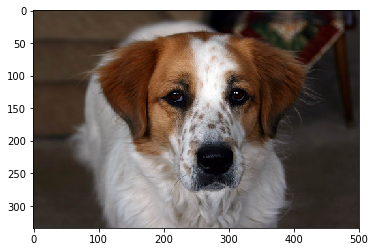

In [43]:
image_prediction('Images/train/037.Brittany/Brittany_02592.jpg')

Hello, Human's Best Friend!
The breed of dog is a Brittany


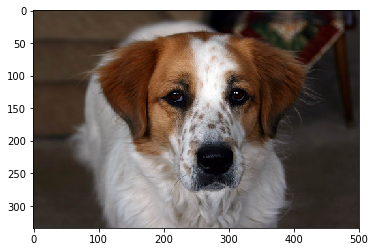

In [44]:
image_prediction("Images/train/037.Brittany/Brittany_02592.jpg")

Hello, Human's Best Friend!
The breed of dog is a Welsh_springer_spaniel


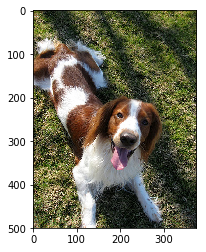

In [45]:
image_prediction("Images/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08195.jpg")

Hello, Human's Best Friend!
The breed of dog is a Curly-coated_retriever


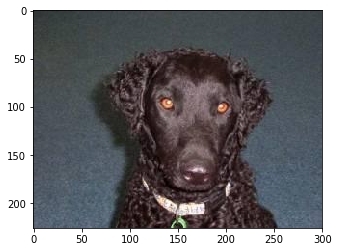

In [46]:
image_prediction("Images/train/055.Curly-coated_retriever/Curly-coated_retriever_03860.jpg")

Hello, Human's Best Friend!
The breed of dog is a American_water_spaniel


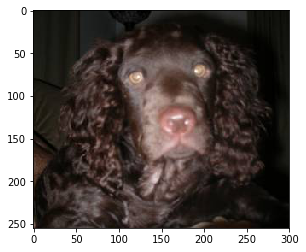

In [47]:
image_prediction("Images/train/009.American_water_spaniel/American_water_spaniel_00623.jpg")

Hello, Human's Best Friend!
The breed of dog is a Labrador_retriever


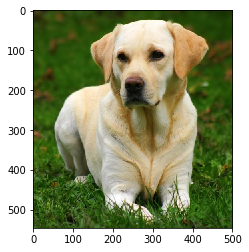

In [48]:
image_prediction("Images/train/096.Labrador_retriever/Labrador_retriever_06457.jpg")

Hello, Human's Best Friend!
The breed of dog is a Labrador_retriever


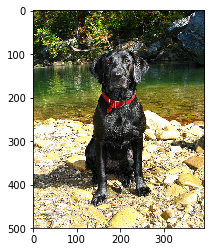

In [49]:
image_prediction("Images/train/096.Labrador_retriever/Labrador_retriever_06464.jpg")

Hello, Human's Best Friend!
The breed of dog is a Labrador_retriever


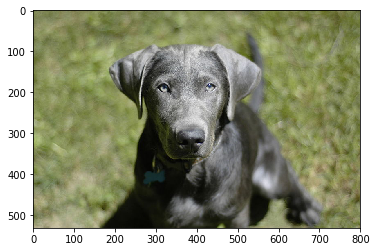

In [50]:
image_prediction("Images/train/096.Labrador_retriever/Labrador_retriever_06492.jpg")

Hello, Human's Best Friend!
The breed of dog is a Labrador_retriever


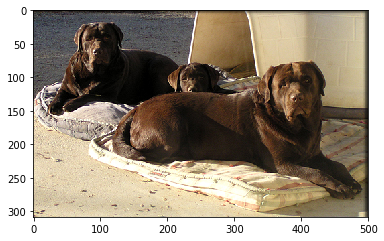

In [51]:
image_prediction("Images/train/096.Labrador_retriever/Labrador_retriever_06486.jpg")

# Conclusion
Our Image predictor is able to predict the challenging dog breeds correctly.